In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\n04\Desktop\EX4.6 Combining and Exporting Data'

In [3]:
df_op = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared', 'ords_prods_grouped.pkl'))

df_op.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend_per_user,high_spenders,median_days_since_prior_ords,frequent_user
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,9.0,Mid-range product,Regular busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


In [4]:
df_op.shape

(32404859, 22)

## BAR CHARTS

<AxesSubplot:>

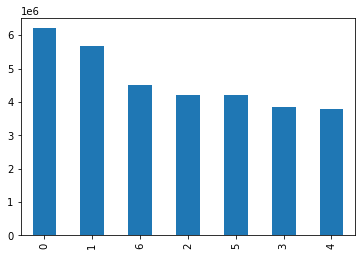

In [5]:
df_op['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

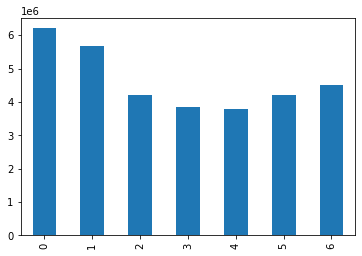

In [6]:
# Change default sorting. Interesting, this is better on the eyes than the naturally sorted one. 

df_op['order_dow'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

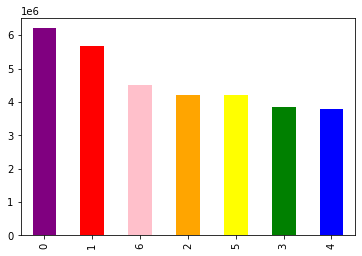

In [7]:
#Add colour

df_op['order_dow'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'], 
                                           tick_label = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri'])


## EXPORTING CHARTS

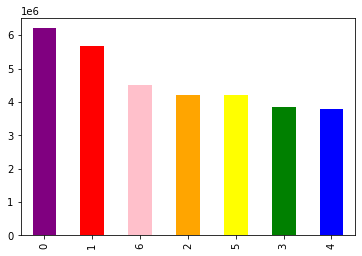

In [8]:
bar = df_op['order_dow'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

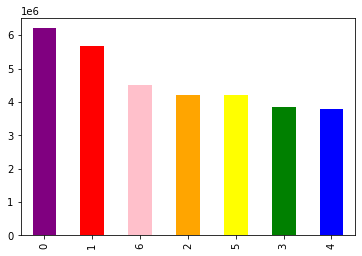

In [9]:
# access bar anytime with figure method from the bar object
bar.figure

In [10]:
# save  to image file
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_orders_dow.png')) 

# it did not show the labelling for the axes during export. Why?

## HISTOGRAMS AND SCATTERPLOTS

<AxesSubplot:ylabel='Frequency'>

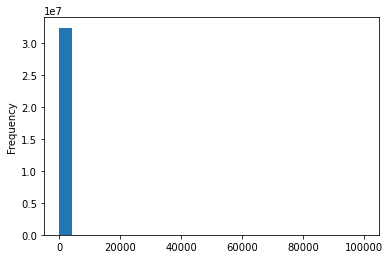

In [11]:
df_op['prices'].plot.hist(bins = 25)

#Why? linked to data prep stage

In [12]:
df_op['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
df_op['prices'].mean()

11.980225638467232

In [14]:
df_op['prices'].median()

7.4

In [15]:
df_op['prices'].max()

99999.0

This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one

#### Scattor plots
When conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers. 

<AxesSubplot:xlabel='prices', ylabel='prices'>

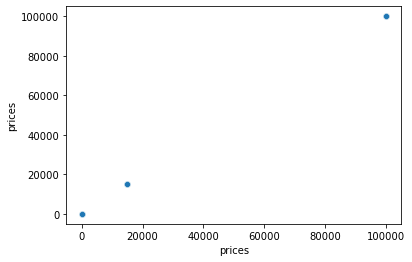

In [16]:
sns.scatterplot(x = 'prices', y = 'prices', data = df_op) # takes a while

In [17]:
df_op.loc[df_op['prices'] > 100].head() # see what is skewing the data viz

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend_per_user,high_spenders,median_days_since_prior_ords,frequent_user
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regular busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regular busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regular busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Most orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Most orders,16,Regular customer,114.426619,High spender,20.0,Regular customer


In [18]:
# turn the outliers into NAN since they don't make sense.
df_op.loc[df_op['prices'] > 100, 'prices'] = np.nan

In [19]:
df_op['prices'].max() # kool

25.0

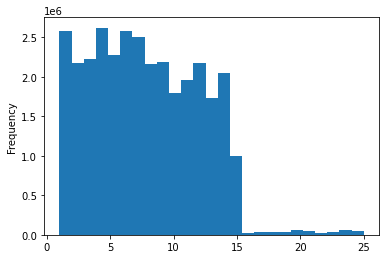

In [20]:
# Lets get back to vizualization
hist = df_op['prices'].plot.hist(bins = 25)

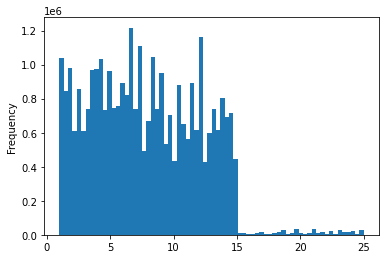

In [21]:
hist2 = df_op['prices'].plot.hist(bins = 70)

In [22]:
hist2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'hist_prices.png'))

## LINE CHART

Subsetting can help but it would be representative of the sample under observation. Representative sampling of the data subset is required.

## SAMPLING DATA

In [23]:
# Creating these samples requires a list of random floating numbers between 0 and 1
#STEP 1
np.random.seed(4) #This “seed” represents a random but reproducible pattern

dev = np.random.rand(len(df_op)) <= 0.7 

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
#not included in stemp, just testing
np.random.rand(1) # the parameter gives the length of the array without affecting the actual value

array([0.93546686])

In [26]:
# how to split the df

#STEP 2-1
big70 = df_op[dev]
# big70

In [27]:
#STEP 2-2
# tilde(~) seen in the second line (small30) negates the argument, in other words, it stores everything that’s not dev, or False.

small30 = df_op[~dev]

In [28]:
#double checking

len(big70) + len(small30)

32404859

In [29]:
len(df_op)

32404859

In [30]:
# spead up process by reducing numbe rof cols - get what's need before making the line chart
df_2 = small30[['order_dow','prices']]

df_2.head()

,order_dow,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


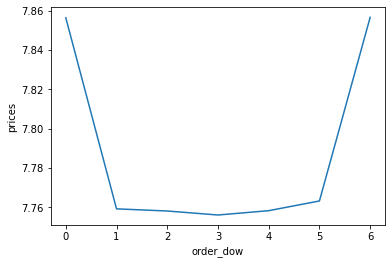

In [31]:
# Finally...the line plot -  for small sample
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

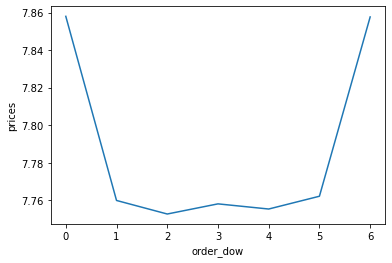

In [32]:
# df_3 = big70[['order_dow','prices']]
line2 = sns.lineplot(data = df_3, x = 'order_dow', y = 'prices')

In [33]:
# Export new dataframe containing more customer groups

df_op.to_pickle(os.path.join(path,'02 Data', 'Prepared', 'ords_prods_grouped.pkl')) # since some data consistensys checks were done